In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
# Dependencies for best fit
from pmdarima import auto_arima
# Ignore harmless warnings 
import warnings
warnings.filterwarnings("ignore")
# Dependencies for SARIMA MOdel
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Dependencies for Mean Square Error
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
ss_df =  pd.read_csv("Resources/Data/Social_data.csv", index_col= "year",  parse_dates = True)

In [3]:
# Data frame for Social Security File
ss_df.head()

,ss_amount
year,
1940-01-01,22.71
1945-01-01,25.11
1950-01-01,43.86
1951-01-01,42.14
1952-01-01,49.25


In [4]:
# ss_df= ss_df.reset_index()
# ss_df['year']= ss_df['year'].dt.year
# # ss_df=ss_df.drop('index') 

# ss_df.head()

In [5]:
# Creating train test split
print(ss_df.shape)
train=ss_df.iloc[:-15]
test=ss_df.iloc[-15:]
print(train.shape,test.shape)

(75, 1)
(60, 1) (15, 1)


In [6]:
# Figure auto the best order for model
stepwise_fit = auto_arima(ss_df["ss_amount"], trace=True, seasonal=True,supress_warnings=True)
#stepwise_fit.summary()
stepwise_fit.get_params()["order"]
# stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=614.851, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=635.964, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=624.088, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=609.461, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=611.460, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=611.459, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=613.461, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.293 seconds


(0, 2, 1)

In [7]:
# SARIMA Model 
model=SARIMAX(train["ss_amount"],order=(0,2,1), seasonal_order=(1,1,1,12))
# ARIMA Model
# model=ARIMA(train["ss_amount"],order=(0,2,0))
model=model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.03478D+00    |proj g|=  2.20105D-01

At iterate    5    f=  2.97040D+00    |proj g|=  2.23501D-02

At iterate   10    f=  2.94798D+00    |proj g|=  3.74602D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     16      1     0     0   5.773D-06   2.948D+00
  F =   2.9479306456054570     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [8]:
# Runing the model for testing prediction
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,type="levels")
#print(pred)
pred.index=ss_df.index[start:end+1] # To set the date value as an index
print(pred)

year
2008-01-01    1115.363600
2009-01-01    1148.203087
2010-01-01    1173.257276
2011-01-01    1208.991359
2012-01-01    1249.947613
2013-01-01    1290.137915
2014-01-01    1329.513045
2015-01-01    1369.290254
2016-01-01    1413.279044
2017-01-01    1459.865214
2018-01-01    1505.023543
2019-01-01    1545.069802
2020-01-01    1587.788848
2021-01-01    1628.632756
2022-01-01    1657.603732
Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='year'>

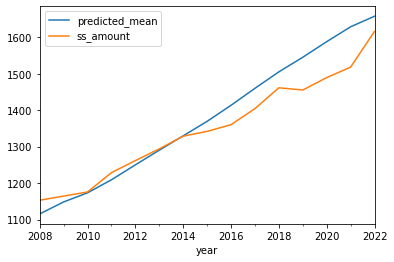

In [9]:
# print the prediction 
pred.plot(legend=True)
test["ss_amount"].plot(legend=True)

In [10]:
#Mean Square Error 
rmse=sqrt(mean_squared_error(pred,test["ss_amount"]))
print(rmse)

53.263793362076754


In [11]:
# Setting the whole dataset for trainning and looking for the end dates 
model2=SARIMAX(ss_df["ss_amount"],order=(0,2,1),seasonal_order=(1,1,1,12))
model2=model2.fit()
ss_df.tail()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.63081D+00    |proj g|=  9.77409D-02

At iterate    5    f=  3.55607D+00    |proj g|=  1.41679D-02

At iterate   10    f=  3.52172D+00    |proj g|=  7.20996D-04

At iterate   15    f=  3.52140D+00    |proj g|=  5.83276D-04

At iterate   20    f=  3.52135D+00    |proj g|=  5.10756D-04


 This problem is unconstrained.



At iterate   25    f=  3.52134D+00    |proj g|=  1.74909D-04

At iterate   30    f=  3.52134D+00    |proj g|=  5.57930D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     40      1     0     0   1.061D-04   3.521D+00
  F =   3.5213373708108495     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


,ss_amount
year,
2018-01-01,1461.31
2019-01-01,1455.22
2020-01-01,1489.30
2021-01-01,1517.98
2022-01-01,1615.96


In [12]:
# printing values for future date 
# To set date range if not appears

index_future_dates= pd.date_range(start="2023", end="2027", freq = 'y')
pred = model2.predict(start=len(ss_df),end=len(ss_df)+3,type="levels").rename("ss_amount")
pred.index =index_future_dates
print(pred)

2023-12-31    1657.424515
2024-12-31    1700.590278
2025-12-31    1743.101004
2026-12-31    1785.592726
Freq: A-DEC, Name: ss_amount, dtype: float64


In [13]:
# Converting future prediction to dataframe
df  = pd.DataFrame(pred)
df.index.rename("year", inplace=True)
future_df = df.round()
future_df

,ss_amount
year,
2023-12-31,1657.0
2024-12-31,1701.0
2025-12-31,1743.0
2026-12-31,1786.0


In [14]:
future_df= future_df.reset_index()
future_df['year']= future_df['year'].dt.year
# ss_df=ss_df.drop('index') 

future_df.head()

,year,ss_amount
0,2023,1657.0
1,2024,1701.0
2,2025,1743.0
3,2026,1786.0


In [15]:
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
import psycopg2
import yaml
import matplotlib.pyplot as plt
import numpy as np

In [16]:
with open('config.yaml') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
db_string = f"postgresql://{config['user_name']}:{config['db_password']}@{config['host_info']}/{config['db_name']}"
# Create the engine
engine = create_engine(db_string)
# Connect to PostgreSQL server

dbConnection = engine.connect();

In [17]:
# Load the future Social value in the Database Table.
future_df.to_sql(name="ss_data_tab", con=engine,if_exists='append',index=False)


4

In [18]:
engine.dispose()